# Workflow

- Dataset Preparation

- Split and Preprocess Data

- Utilities for Metric Evaluation and Plotting

- Hyper-Parameters

- Building Model

- Training

- Testing

- Display performance

# Loading Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
%%capture
from tqdm import tqdm_notebook as tqdm_nb
from tqdm import tnrange
tqdm_nb().pandas()

# Dataset Preparation

In [3]:
np.random.seed(0)
x = 3 * np.random.randn(500) + 0.75    # Array of 500 values with mean = 0.75, stddev = 3
res = 0.5 * np.random.randn(500)       # Generate 100 residual terms
y = 2 + 0.3 * x + res                  # Actual values of Y

In [4]:
df = pd.DataFrame(
    {'X': x,
     'Y': y})

In [5]:
df.head()

,X,Y
0,6.042157,4.004013
1,1.950472,2.568020
2,3.686214,3.654038
3,7.472680,4.124696
4,6.352674,3.732077


# Split and Preprocess Data

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,  random_state = 42)

In [7]:
train.shape

(375, 2)

In [8]:
test.shape

(125, 2)

# Data conversion to Torch

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
torch.manual_seed(42)

In [10]:
feature_set_x = ['X']
feature_set_y = ['Y']

In [11]:
train_x =Variable(torch.FloatTensor(train[feature_set_x].values), requires_grad = False)
train_y =Variable(torch.FloatTensor(train[feature_set_y].values), requires_grad = False)

test_x =Variable(torch.FloatTensor(test[feature_set_x].values), requires_grad = False)
test_y =Variable(torch.FloatTensor(test[feature_set_y].values), requires_grad = False)

# Utilities for Metric Evaluation and Plotting

In [12]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
%matplotlib inline

from sklearn.metrics import mean_squared_error as error_metric

In [13]:
def plot_fn(loss):
    loss = np.array(loss, dtype = np.float)
    plt.plot(loss)

In [14]:
def format_results(epoch  , loss , acc):
    print ( "Epoch: {0:5d},  Loss : {1:0.4f} ,  Error_metric : {2:0.4f}". 
           format(epoch, loss , acc))

# Hyper Parameters

Change values in the followng sections to see how the accuracy can be increased

In [15]:
num_epoch = 50
per_epoch = int(num_epoch/10)
lr = 0.001

In [16]:
num_features = 1  # Dimension of input features
num_classes  = 1  # Dimension of output

In [17]:
# Try various activation functions
actv_func = nn.ReLU()

In [18]:
# No of hidden layers and their size
# h_layers = [ 1 ]     # Trial 1
h_layers = [ ]         # Trial 2

# Building Model

In [19]:
def Create_hidden(h_layers):
    layers = []
    input_num = num_features
    
    for h in h_layers:
        output_num = h
        #print(input_num , output_num)
        layers.append ( nn.Linear(input_num , output_num) ) 
        layers.append ( actv_func )
        input_num = h
        
    layers.append ( nn.Linear(input_num , num_classes) ) 
    net = nn.Sequential(*layers)
    return net

In [20]:
class Linear_Regression(nn.Module):
    def __init__(self):
        super(Linear_Regression, self).__init__()
        self.net = Create_hidden(h_layers)
        
    def forward(self,x):
        y = self.net(x)
        return y

In [21]:
model = Linear_Regression()

In [22]:
model

Linear_Regression(
  (net): Sequential(
    (0): Linear(in_features=1, out_features=1, bias=True)
  )
)

In [23]:
loss_fn = nn.MSELoss()
opt_fn  = torch.optim.SGD(model.parameters(), lr=lr)

# Training

In [24]:
loss_array = []

for epoch in tnrange(num_epoch):
    
    pred_y = model(train_x)
    loss = loss_fn(pred_y, train_y)    
    
    opt_fn.zero_grad()

    loss.backward()
    opt_fn.step()    
    
    losses = np.array(loss_array, dtype = np.float)
    loss_array.append(loss.item())
    
    res_y = (pred_y.detach().numpy())
    
    if (epoch) % per_epoch == 0:
        format_results( epoch+1 , loss.item() , error_metric(train_y, res_y) )

Epoch:     1,  Loss : 2.8190 ,  Error_metric : 2.8190
Epoch:     6,  Loss : 2.5763 ,  Error_metric : 2.5763
Epoch:    11,  Loss : 2.3721 ,  Error_metric : 2.3721
Epoch:    16,  Loss : 2.1999 ,  Error_metric : 2.1999
Epoch:    21,  Loss : 2.0540 ,  Error_metric : 2.0540
Epoch:    26,  Loss : 1.9300 ,  Error_metric : 1.9300
Epoch:    31,  Loss : 1.8242 ,  Error_metric : 1.8242
Epoch:    36,  Loss : 1.7333 ,  Error_metric : 1.7333
Epoch:    41,  Loss : 1.6550 ,  Error_metric : 1.6550
Epoch:    46,  Loss : 1.5870 ,  Error_metric : 1.5870



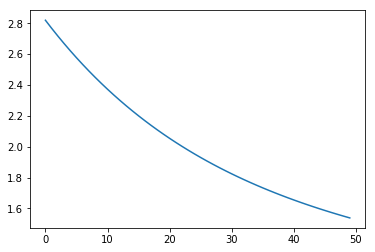

In [25]:
plot_fn(loss_array)

# Testing

In [26]:
pred_y = model(test_x)

In [27]:
pred_y.shape

torch.Size([125, 1])

In [28]:
res = (pred_y.detach().numpy())
res.shape

(125, 1)

In [29]:
error_metric(train_y, res_y)

1.538923